Importing libraries for data handling and visualizations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

ModuleNotFoundError: No module named 'pandas'

Loading the obesity dataset into a pandas DataFrame

In [ ]:
df = pd.read_csv("../data/clean_youth_obesity.csv")
df.head()





,yearend,locationabbr,locationdesc,sex,stratification1,grade,question,data_value
0,2003,AK,Alaska,Female,Female,NaN,Percent of students in grades 9-12 who have ob...,8.1
1,2003,AK,Alaska,NaN,9th,9th,Percent of students in grades 9-12 who have ob...,12.4
2,2003,AK,Alaska,NaN,10th,10th,Percent of students in grades 9-12 who have ob...,11.8
3,2003,AK,Alaska,NaN,11th,11th,Percent of students in grades 9-12 who have ob...,9.2
4,2003,AK,Alaska,NaN,12th,12th,Percent of students in grades 9-12 who have ob...,9.5


Plotting obesity rates among high schoolers based on gender.

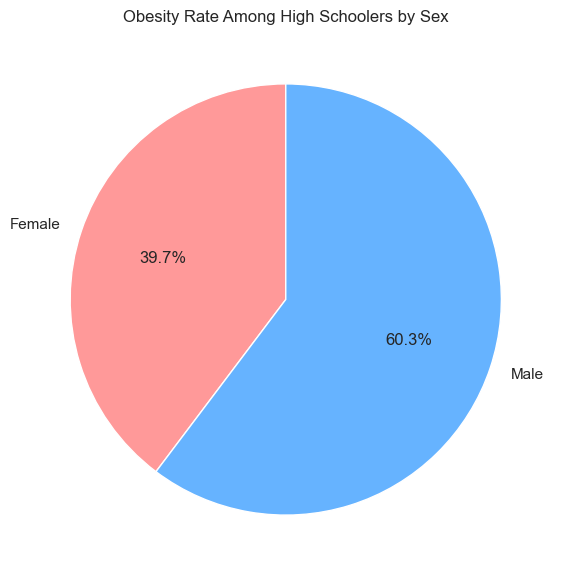

In [ ]:
data = df.groupby('sex')['data_value'].mean()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Obesity Rate Among High Schoolers by Sex")
plt.show()

Comparing obesity rates across different racial/ethnic groups of High-Schoolers

/var/folders/zc/mybvrncx2nq2lwzm02n9zq2r0000gn/T/ipykernel_96133/1158667230.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=race_df, x="stratification1", y="data_value", palette="pastel")


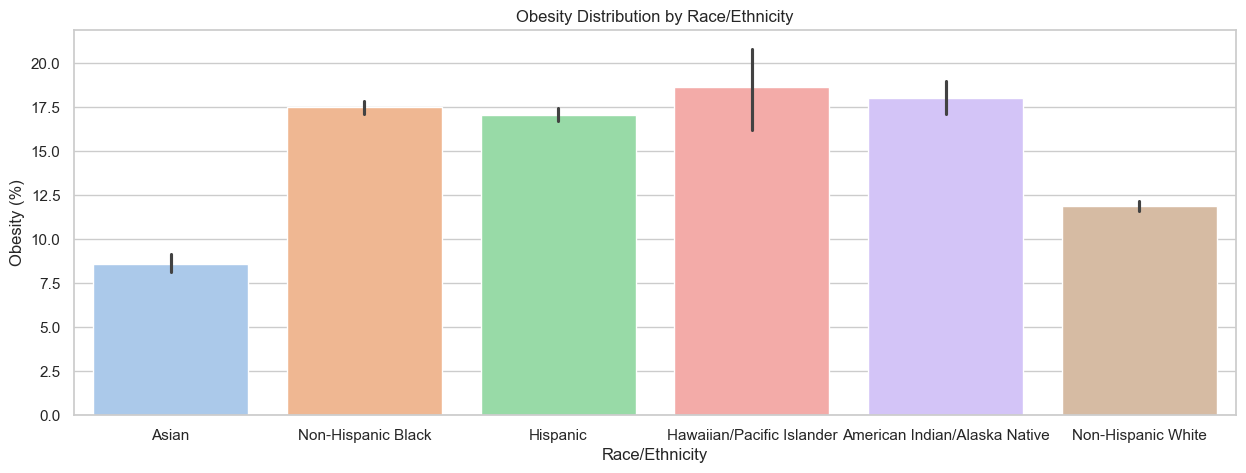

In [ ]:
race_values = [
    "Hispanic",
    "Hawaiian/Pacific Islander",
    "Asian",
    "American Indian/Alaska Native",
    "Non-Hispanic Black",
    "Non-Hispanic White"
]
race_df = df[df["stratification1"].isin(race_values)]
race_df.shape
race_counts = race_df.groupby("stratification1")["data_value"].mean()

plt.figure(figsize=(15,5))  # Sets the figure size (width=10, height=5)
sns.barplot(data=race_df, x="stratification1", y="data_value", palette="pastel")
plt.title("Obesity Distribution by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Obesity (%)")
plt.show()



Showing obesity rates in High School kids across U.S. states in a horizontal bar chart.

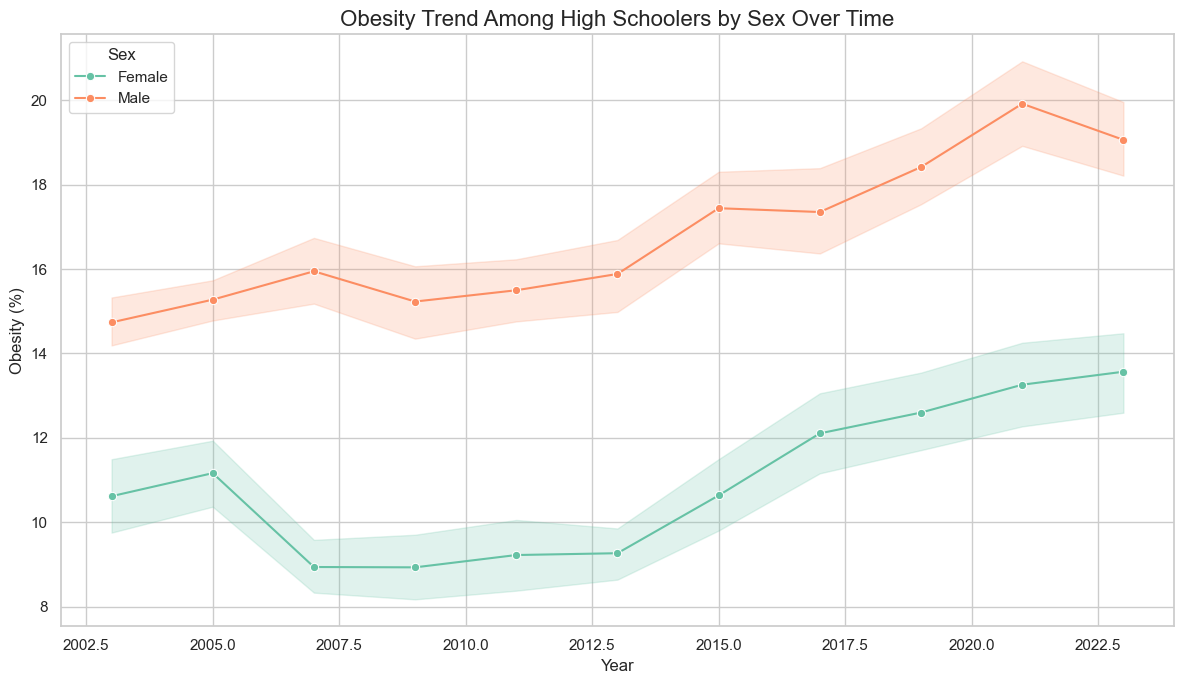

In [ ]:
plt.figure(figsize=(12,7))
df["yearend"] = df["yearend"].astype(int)
# Line plot with markers for each sex
sns.lineplot(
    data=df,
    x="yearend",
    y="data_value",
    hue="sex",       # separate lines/colors per sex
    marker="o",
    palette="Set2"    # distinct colors for sex
)

plt.title("Obesity Trend Among High Schoolers by Sex Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Obesity (%)", fontsize=12)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

Visualizing obesity proportions for the top 10 states with highest obesity.

/var/folders/zc/mybvrncx2nq2lwzm02n9zq2r0000gn/T/ipykernel_96133/1703542961.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_states.index, y=top10_states.values, palette="viridis")


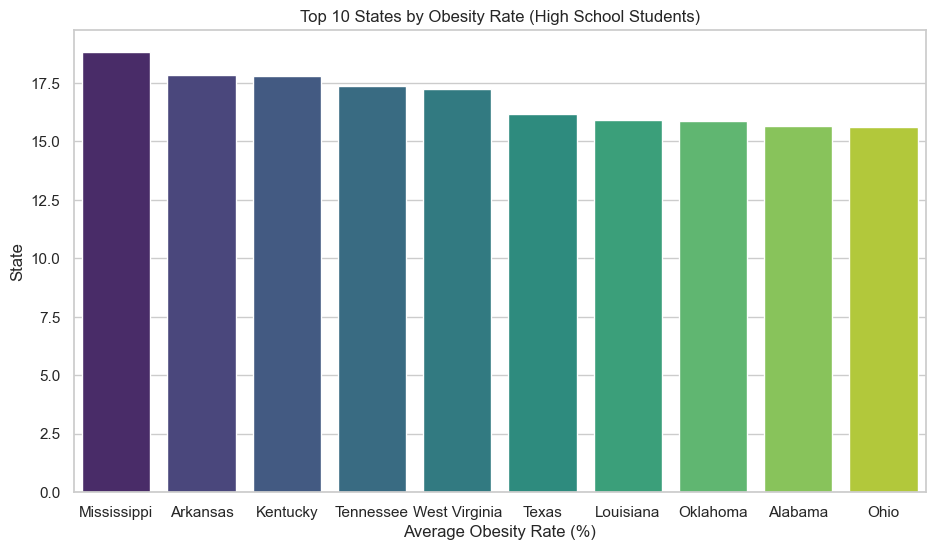

In [ ]:
df_filtered = df[df["locationdesc"] != "Guam"]

top10_states = df_filtered.groupby("locationdesc")["data_value"].mean().nlargest(10)

plt.figure(figsize=(11,6))
sns.barplot(x=top10_states.index, y=top10_states.values, palette="viridis")
plt.xlabel("Average Obesity Rate (%)")
plt.ylabel("State")
plt.title("Top 10 States by Obesity Rate (High School Students)")
plt.show()